In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("MediumDataAfterEDA.csv")

In [7]:
grouped_df = df.groupby('Tag')['Paragraph'].apply(lambda x: ' '.join(x)).reset_index()
grouped_df.head(2)

,Tag,Paragraph
0,Data Science,"In October 2020, I was interviewed by DrivenDa..."
1,Education,"On a warm Boston summer in 2018, I was just se..."


In [8]:
tag_paragraph_dict = dict(zip(grouped_df['Tag'], grouped_df['Paragraph']))

In [9]:
value_count_df = df["Tag"].value_counts()
value_count_df.index

Index(['Data Science', 'Machine Learning', 'Education', 'Personal Development',
       'Programming', 'Technology'],
      dtype='object')

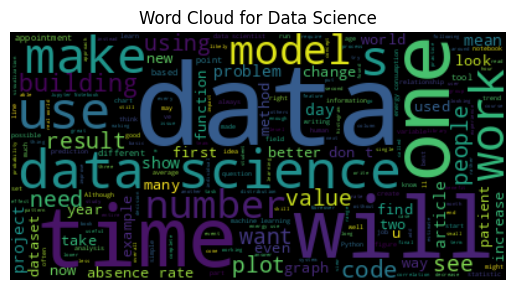

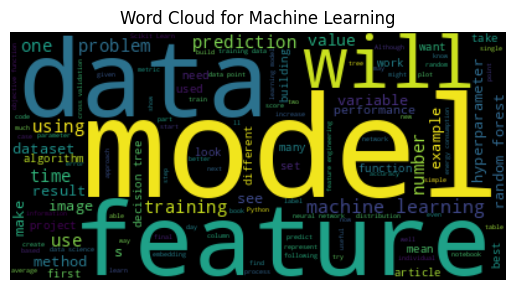

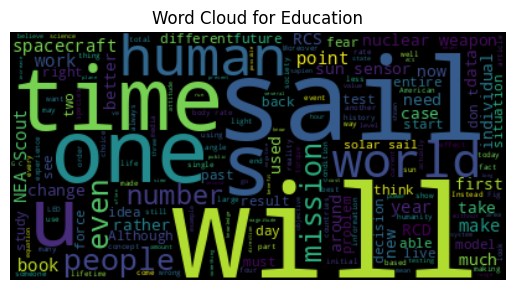

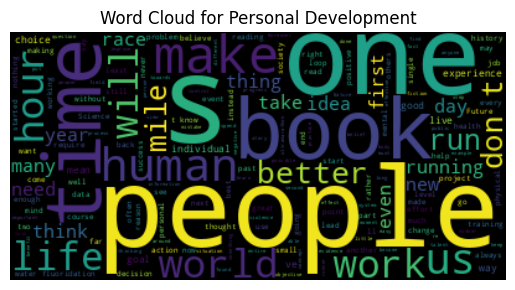

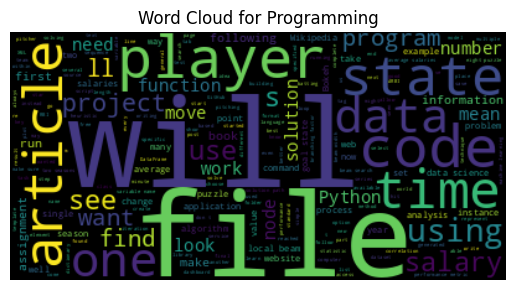

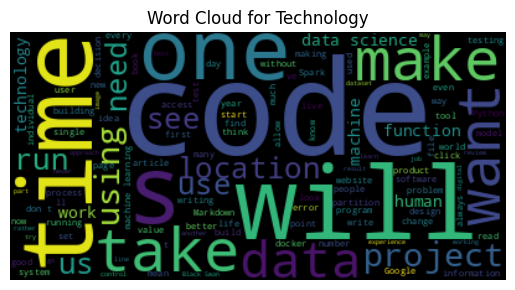

In [10]:
from wordcloud import WordCloud
for category in value_count_df.index:
  text = tag_paragraph_dict[category]
  wordcloud = WordCloud().generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {category}')
  plt.axis('off')
  plt.show()

In [11]:
from textblob import TextBlob

In [12]:
text_df = df[["title","Paragraph"]].copy()

In [13]:
df.columns

Index(['title', 'Author', 'Upvote', 'CommentCount', 'Publish Date',
       'Read Time', 'Paragraph', 'Links', 'Tag', 'Weekday', 'Month', 'Year',
       'BlogLength', 'Consolidated Tag'],
      dtype='object')

In [14]:
text_df["Blog_Sentiment"] = text_df["Paragraph"].apply(lambda text :TextBlob(text).sentiment.polarity )

In [15]:
text_df

,title,Paragraph,Blog_Sentiment
0,DrivenData Interview,"In October 2020, I was interviewed by DrivenDa...",0.190169
1,A Data Science Conversation,Talking is a lot like writing in that it force...,0.168182
2,"12 Lessons from 55,000 pages of books",Reading 136 books in a year does not get you t...,0.137731
3,Books of 2019,Before we get started: reading books does not ...,0.170933
4,“Just Do It” Won’t Get You to Your Goals,Rule number one for achieving goals: don’t tak...,0.101454
...,...,...,...
150,The Triumph of Peace,A review of The Better Angels of Our Nature: W...,0.073269
151,Home of the Scared,A review of A Culture of Fear: Why Americans a...,0.044034
152,Capstone Project: Mercedes-Benz Greener Manufa...,Author’s Note: This is the report I completed ...,0.142016
153,"The Vanquishing of War, Plague and Famine",Part 1 of the Optimist’s Guide to the 21st Cen...,0.055079


In [16]:
text_df["Blog_Subjectivity"] = text_df["Paragraph"].apply(lambda text :TextBlob(text).sentiment.subjectivity)

In [17]:
text_df.head(2)

,title,Paragraph,Blog_Sentiment,Blog_Subjectivity
0,DrivenData Interview,"In October 2020, I was interviewed by DrivenDa...",0.190169,0.457339
1,A Data Science Conversation,Talking is a lot like writing in that it force...,0.168182,0.480303


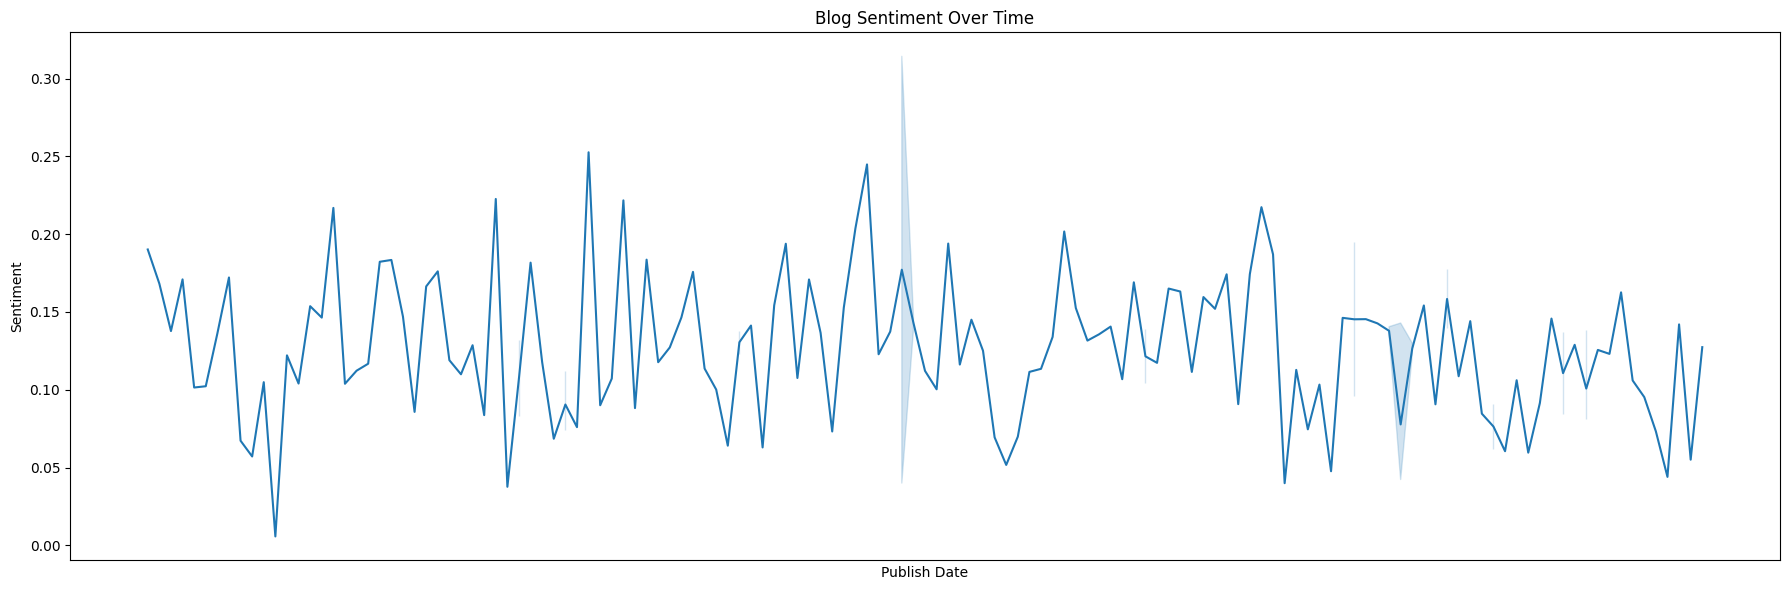

In [18]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df["Publish Date"], y=text_df["Blog_Sentiment"])
plt.title('Blog Sentiment Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Sentiment')
plt.xticks([])
plt.tight_layout()
plt.show()

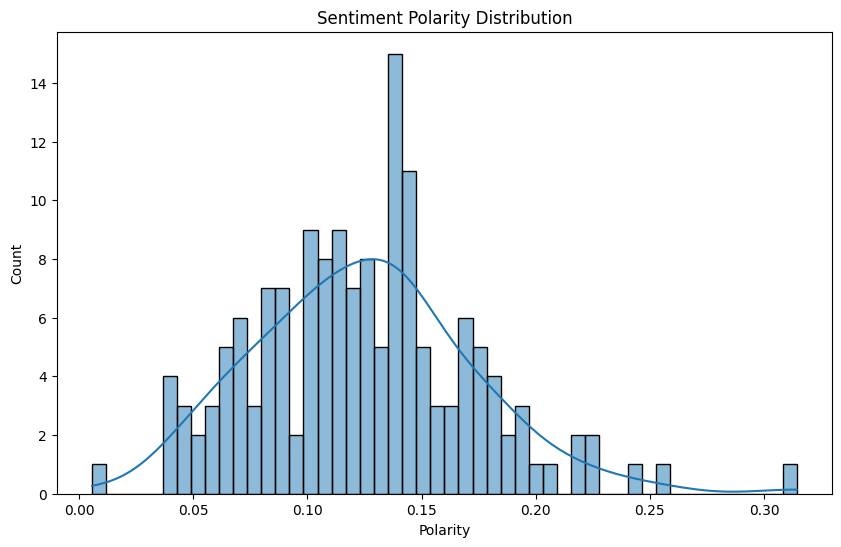

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=text_df, x='Blog_Sentiment', bins=50, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

Upon analyzing the plots, it's evident that most of Will's content exhibits a consistently positive sentiment. The sentiment scores predominantly range from 0 to 0.3 across various categories or tags.

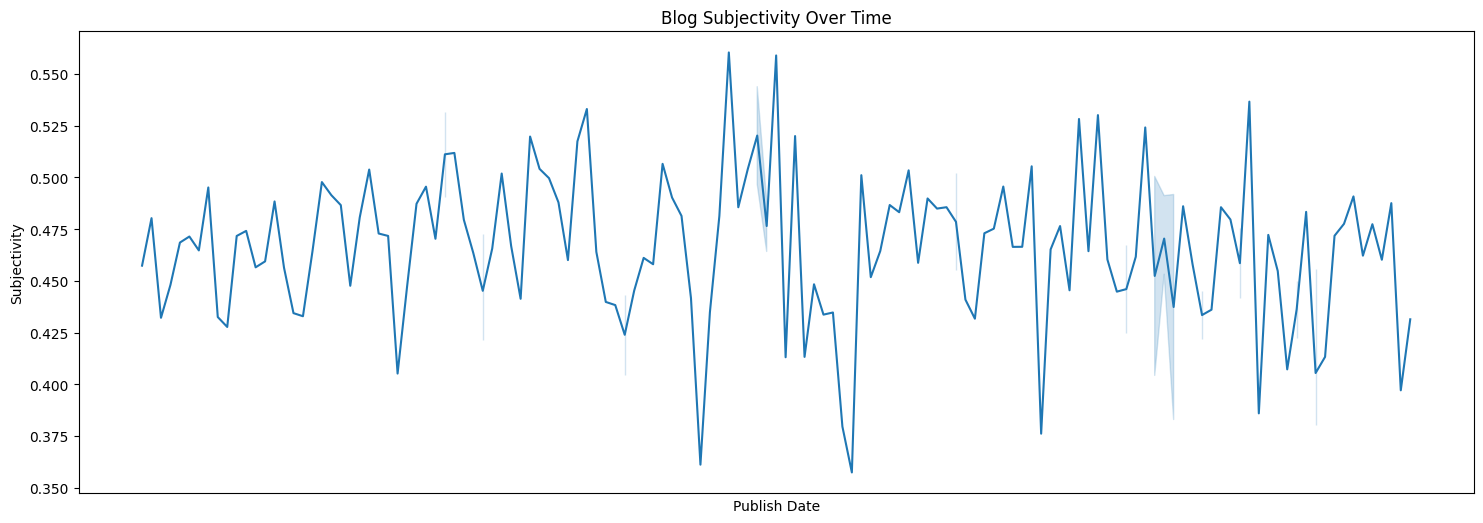

In [20]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df["Publish Date"], y=text_df["Blog_Subjectivity"])
plt.title('Blog Subjectivity Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Subjectivity')
plt.xticks([])
plt.show()

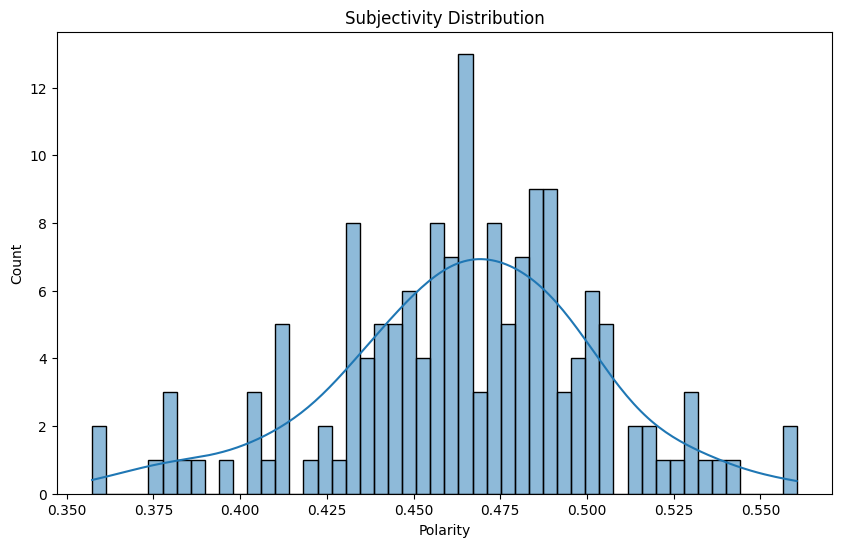

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=text_df, x='Blog_Subjectivity', bins=50, kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

Upon analyzing the plots, it's noticeable that the subjectivity scores for Will's content typically fall within the range of 0.35 to 0.55. This indicates a moderate level of subjectivity present in Will's writing across various categories or tags.

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
import tqdm
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
corpus_before_stop_words = []
for i in range(len(text_df["Paragraph"])):
    blog = re.sub("[^a-zA-Z0-9]",' ',text_df["Paragraph"][i])
    blog = blog.lower().split()
    blog = [lemmatizer.lemmatize(word) for word in blog]
    blog = " ".join(blog)
    corpus_before_stop_words.append(blog)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
def get_top_n_words(corpus, n=None,ngram=(1,1)):
    vec = CountVectorizer(ngram_range=ngram).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [26]:
common_words = get_top_n_words(corpus_before_stop_words, 20)

In [27]:
for word, freq in common_words:
    print(word, freq)

the 26750
to 11821
of 10741
and 8383
in 6623
is 5977
we 5020
for 4284
that 3684
on 3211
this 3147
data 3077
with 2962
it 2884
are 2813
can 2809
be 2581
model 2284
you 2076
by 2059


In [28]:
df1 = pd.DataFrame(common_words, columns = ['Paragraph' , 'Count'])

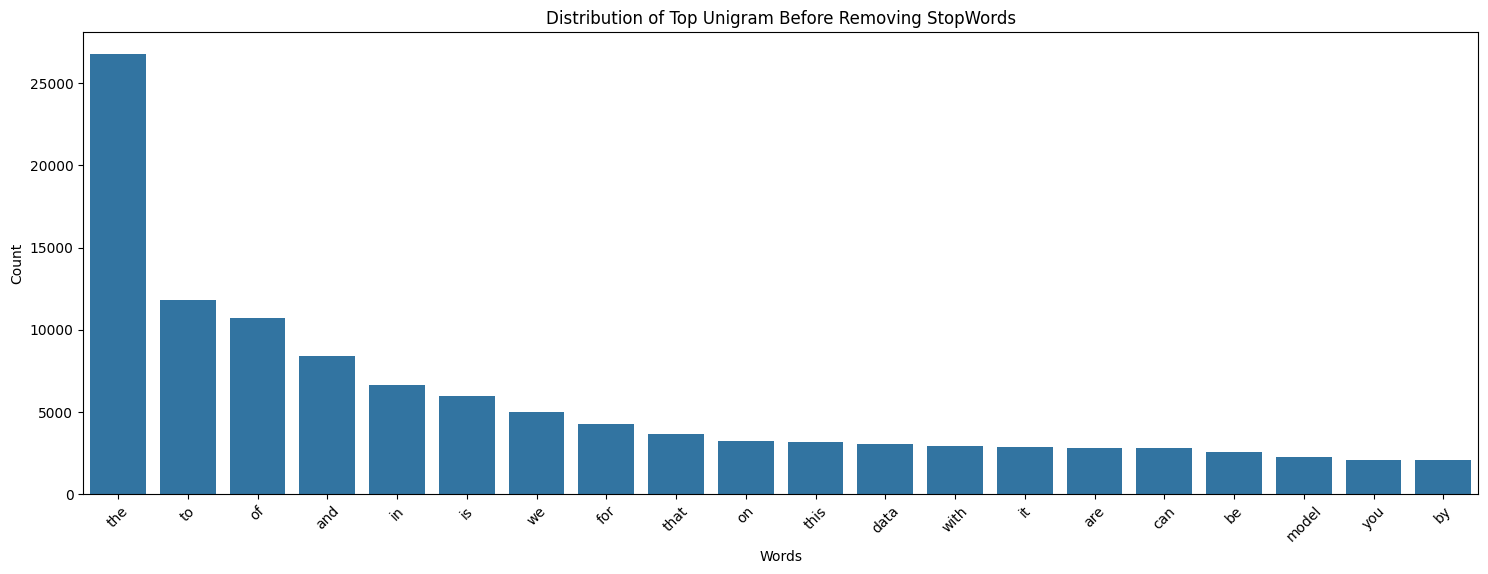

In [29]:
plt.figure(figsize=(18, 6))
sns.barplot(x=df1["Paragraph"], y=df1["Count"])
plt.title('Distribution of Top Unigram Before Removing StopWords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [30]:
corpus_after_removing_stop_words = []
for i in range(len(text_df["Paragraph"])):
    blog = re.sub("[^a-zA-Z0-9]",' ',text_df["Paragraph"][i])
    blog = blog.lower().split()
    blog = [lemmatizer.lemmatize(word) for word in blog if word not in set(set(stopwords.words('english')))]
    blog = " ".join(blog)
    corpus_after_removing_stop_words.append(blog)

In [31]:
common_words = get_top_n_words(corpus_after_removing_stop_words, 20)

In [32]:
df2 = pd.DataFrame(common_words, columns = ['Paragraph' , 'Count'])

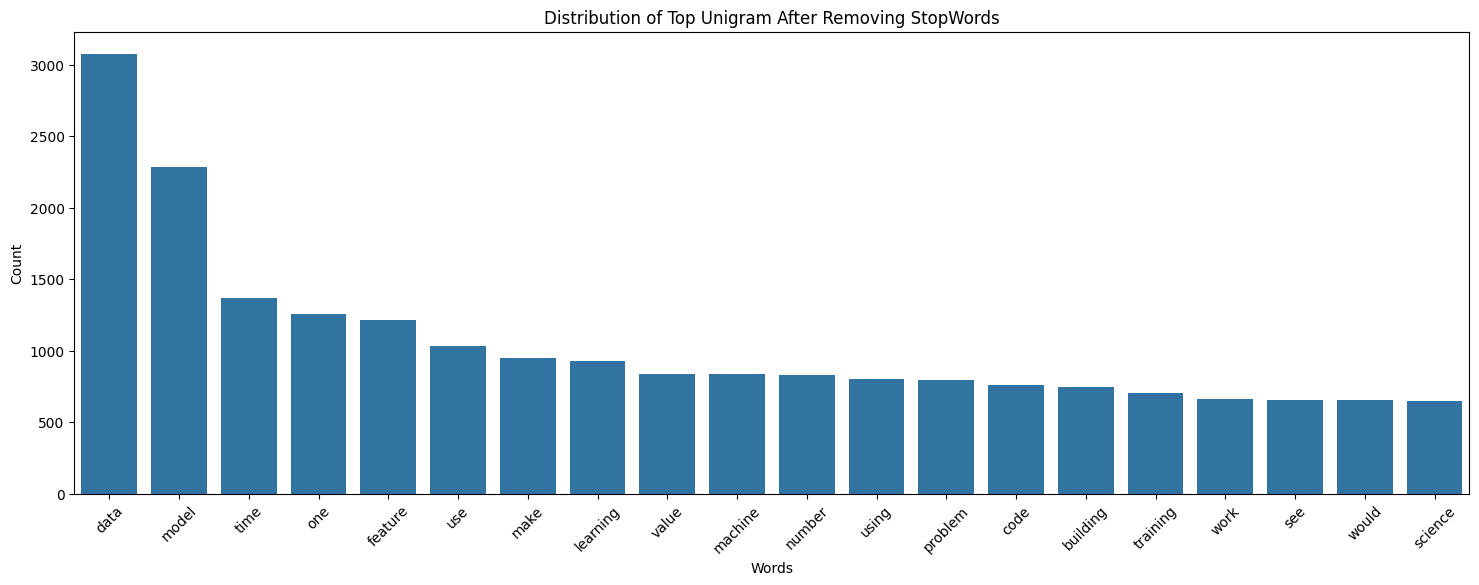

In [33]:
plt.figure(figsize=(18, 6))
sns.barplot(x=df2["Paragraph"], y=df2["Count"])
plt.title('Distribution of Top Unigram After Removing StopWords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

It comes as no surprise that the most frequent time, data, model words are predominantly associated with data science and machine learning. Given the nature of Will's content, which primarily focuses on these domains, it is expected to observe a high frequency of time,data model related to these fields.

In [34]:
common_words = get_top_n_words(corpus_before_stop_words, 20,ngram=(2,2))


In [35]:
df3 = pd.DataFrame(common_words, columns = ['Paragraph' , 'Count'])

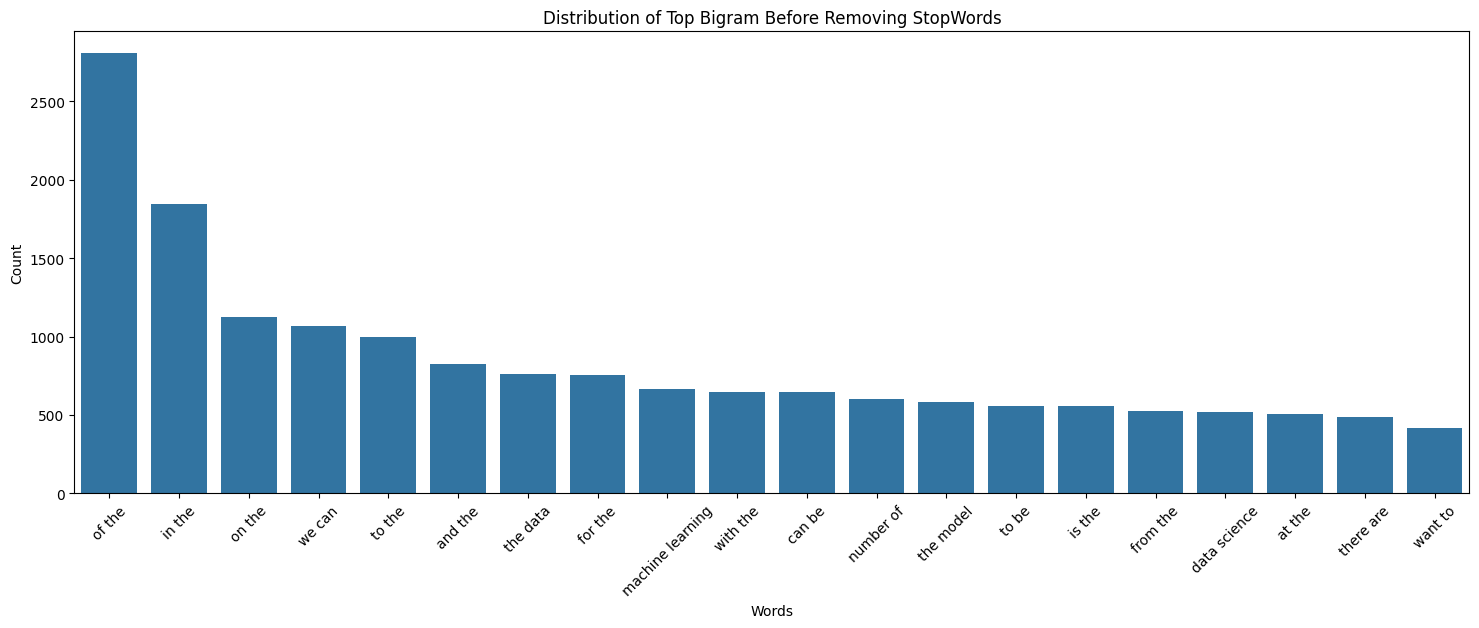

In [36]:
plt.figure(figsize=(18, 6))
sns.barplot(x=df3["Paragraph"], y=df3["Count"])
plt.title('Distribution of Top Bigram Before Removing StopWords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
common_words = get_top_n_words(corpus_after_removing_stop_words, 20,ngram=(2,2))
df4 = pd.DataFrame(common_words, columns = ['Paragraph' , 'Count'])

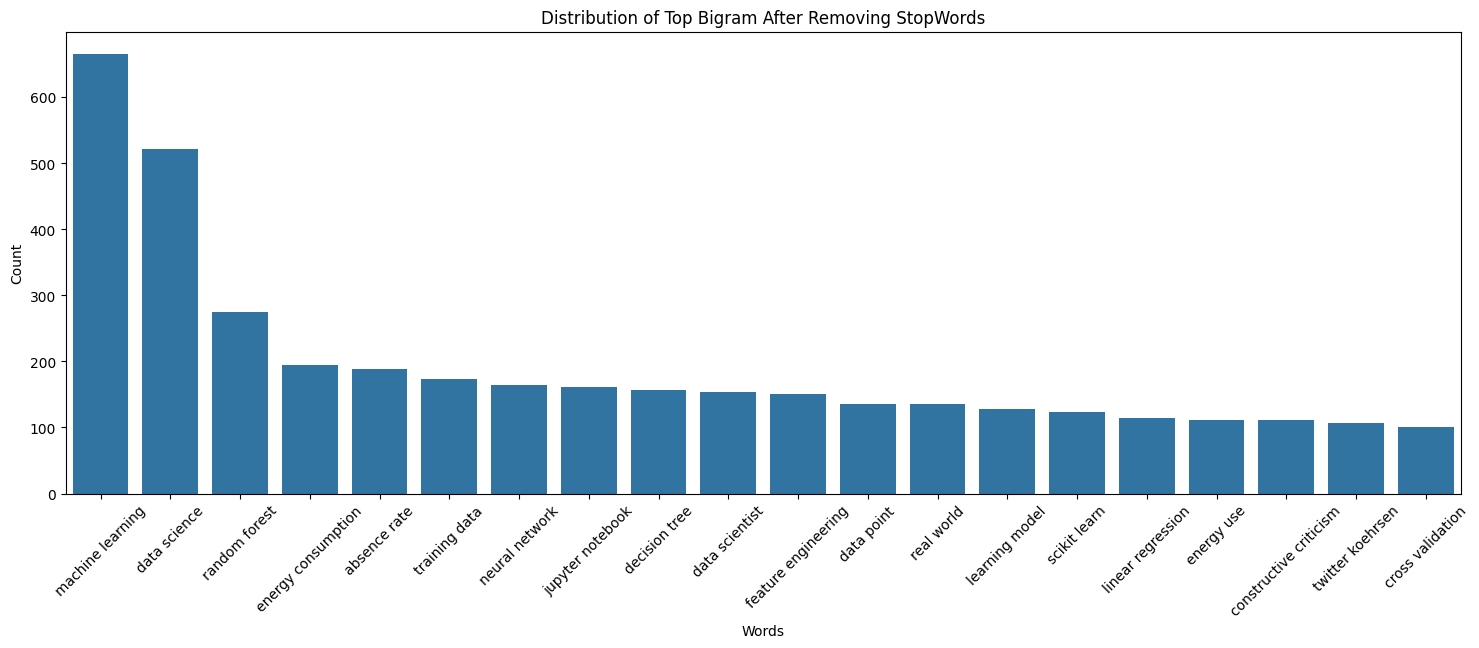

In [38]:
plt.figure(figsize=(18, 6))
sns.barplot(x=df4["Paragraph"], y=df4["Count"])
plt.title('Distribution of Top Bigram After Removing StopWords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Again most frequent **Machine Learning, Data Science, Random Forest** words are predominantly associated with data science and machine learning which was expected from Will's Content

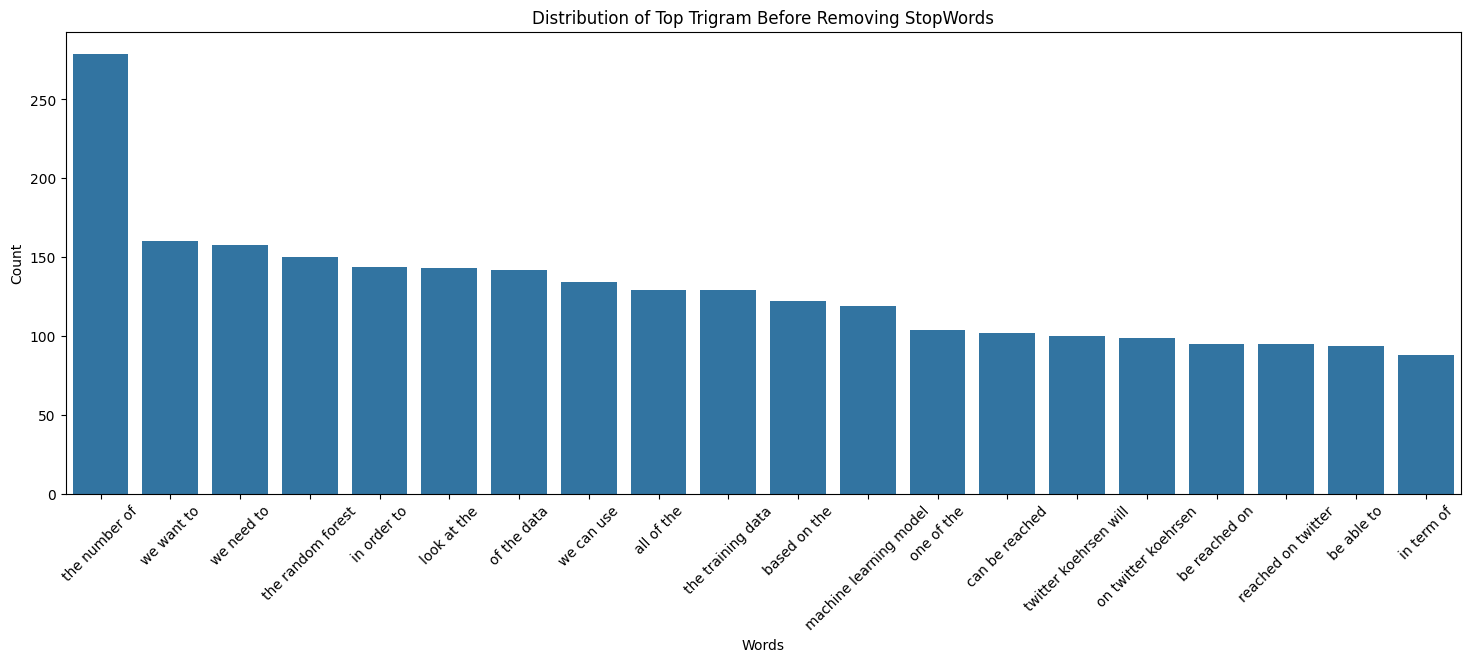

In [39]:
common_words = get_top_n_words(corpus_before_stop_words, 20,ngram=(3,3))
df5 = pd.DataFrame(common_words, columns = ['Paragraph' , 'Count'])
plt.figure(figsize=(18, 6))
sns.barplot(x=df5["Paragraph"], y=df5["Count"])
plt.title('Distribution of Top Trigram Before Removing StopWords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

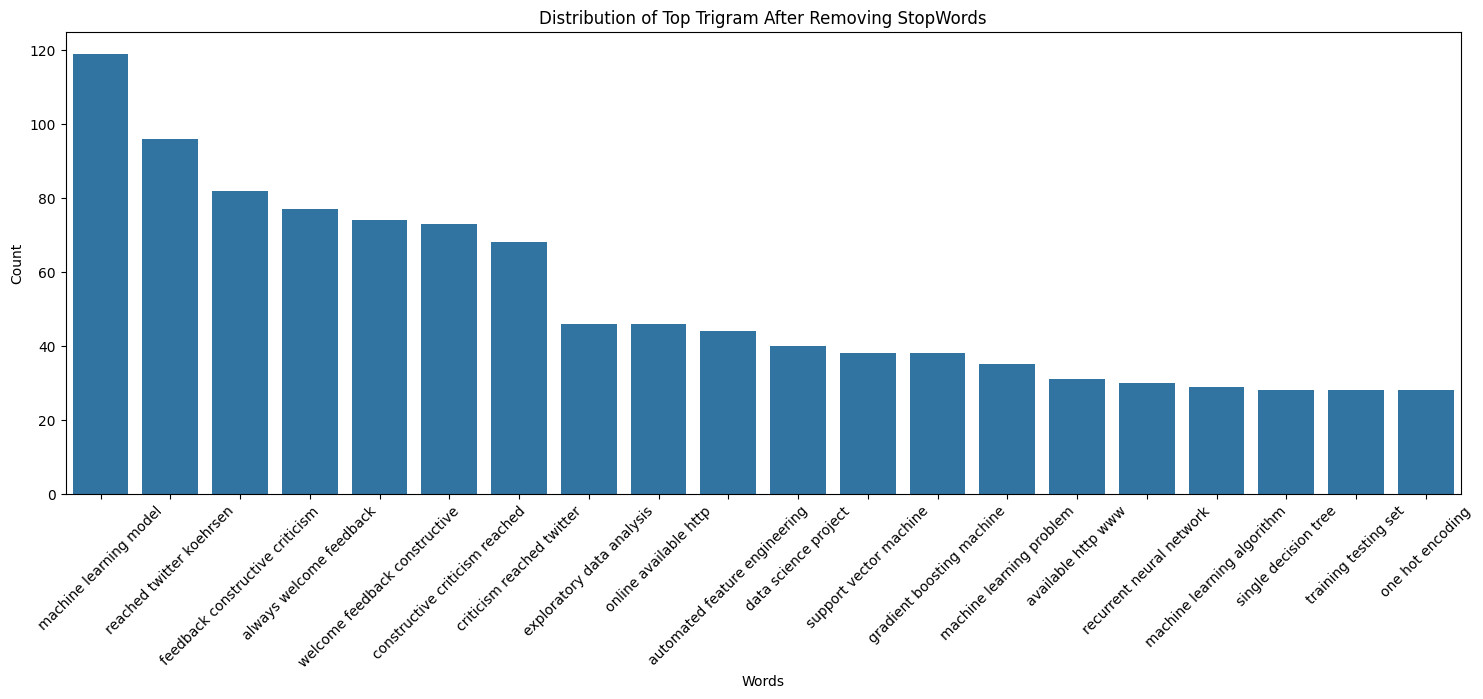

In [40]:
common_words = get_top_n_words(corpus_after_removing_stop_words, 20,ngram=(3,3))
df6 = pd.DataFrame(common_words, columns = ['Paragraph' , 'Count'])
plt.figure(figsize=(18, 6))
sns.barplot(x=df6["Paragraph"], y=df6["Count"])
plt.title('Distribution of Top Trigram After Removing StopWords')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*Since Most of Blogs are about Machine Learning, This Distribution Makes Sence*

# Part of Speech Tagging


In [41]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

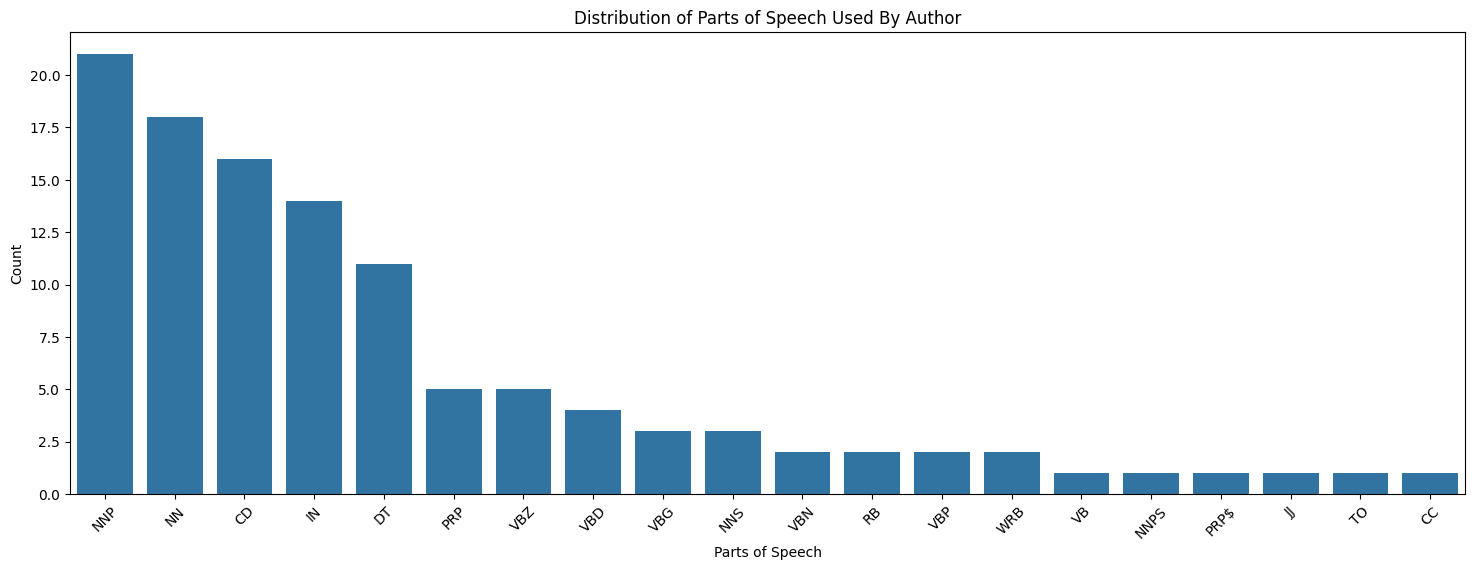

In [42]:
blob = TextBlob(str(text_df['Paragraph']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_counts = pos_df.pos.value_counts()[:20]
pos_counts_df = pd.DataFrame({'pos': pos_counts.index, 'count': pos_counts.values})
plt.figure(figsize=(18, 6))
sns.barplot(x=pos_counts_df["pos"], y=pos_counts_df["count"])
plt.title('Distribution of Parts of Speech Used By Author')
plt.xlabel('Parts of Speech')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

NNP - Proper noun, singular
NN - Noun, singular or mass
CD - Cardinal number
IN - Preposition or subordinating conjunction
DT - Determiner
PRP - Personal pronoun
VBZ - Verb, 3rd person singular present
VBD - Verb, past tense
VBG - Verb, gerund or present participle
NNS - Noun, plural
VBN - Verb, past participle
RB - Adverb
VBP - Verb, non-3rd person singular present
WRB - Wh-adverb
VB - Verb, base form
NNPS - Proper noun, plural
PRP$ - Possessive pronoun
JJ - Adjective
TO - to
CC - Coordinating conjunction

# Finding characteristic terms and their associations

In [43]:
tag_df = df[["Paragraph","Tag"]].copy()
tag_df.head(2)

,Paragraph,Tag
0,"In October 2020, I was interviewed by DrivenDa...",Data Science
1,Talking is a lot like writing in that it force...,Data Science


In [44]:
!pip install -q scattertext
import scattertext as st
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [45]:
nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(tag_df,category_col="Tag", text_col="Paragraph",nlp=nlp).build()

In [46]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['hyperparameters', 'jupyter', 'github', 'hyperparameter', 'dataframe', 'twitter', 'scikit', 'kaggle', 'featuretools', 'importances']


In [47]:
corpus.get_term_freq_df().columns

Index(['Data Science freq', 'Personal Development freq', 'Technology freq',
       'Machine Learning freq', 'Programming freq', 'Education freq'],
      dtype='object')

In [48]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Data Science'] = corpus.get_scaled_f_scores('Data Science')
print(list(term_freq_df.sort_values(by='Data Science', ascending=False).index[:10]))

['absence', 'absence rate', 'appointment', 'patients', 'appointments', 'age', 'reminders', 'rate', 'markers', 'team']


In [49]:
term_freq_df['Machine Learning'] = corpus.get_scaled_f_scores('Machine Learning')
print(list(term_freq_df.sort_values(by='Machine Learning', ascending=False).index[:10]))

['hyperparameter', 'optimization', 'hyperparameters', 'network', 'tree', 'features', 'decision tree', 'images', 'validation', 'the training']


In [53]:
term_freq_df['Personal Development'] = corpus.get_scaled_f_scores('Personal Development')
print(list(term_freq_df.sort_values(by='Personal Development', ascending=False)))

['Data Science freq', 'Personal Development freq', 'Technology freq', 'Machine Learning freq', 'Programming freq', 'Education freq', 'Data Science', 'Machine Learning', 'Personal Development', 'Technology', 'Programming', 'Education']


In [52]:
cols = tag_df["Tag"].unique()
for id in cols:
  term_freq_df[id] = corpus.get_scaled_f_scores(id)
  print(f"Characterstic Term in Category {id}")
  print(list(term_freq_df.sort_values(by=id, ascending=False).index[:10]))

Characterstic Term in Category Data Science
['absence', 'absence rate', 'appointment', 'patients', 'appointments', 'age', 'reminders', 'rate', 'markers', 'team']
Characterstic Term in Category Personal Development
['fluoridation', 'water fluoridation', 'race', 'miles', 'the race', 'water', 'mile', 'fiction', 'finish', 'ultramarathon']
Characterstic Term in Category Technology
['docker', 'spark', 'your location', 'chrome', 'cluster', 'partition', 'your code', 'markdown', 'digital', 'swan']
Characterstic Term in Category Machine Learning
['hyperparameter', 'optimization', 'hyperparameters', 'network', 'tree', 'features', 'decision tree', 'images', 'validation', 'the training']
Characterstic Term in Category Programming
['beam', 'puzzle', 'players', 'goal state', 'the puzzle', 'salary', 'salaries', 'local beam', 'players with', '2008']
Characterstic Term in Category Education
['sail', 'the sail', 'torque', 'nea', 'nea scout', 'angle', 'rcs', 'the spacecraft', 'roll', 'the rcs']


# Topic Modelling

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
tags = np.array(df["Tag"])
model_df = pd.DataFrame({"Blog":corpus_after_removing_stop_words,"Tag":tags})
X_train, X_test = train_test_split(model_df,test_size=0.15,random_state=42)

In [55]:
vectorizer = CountVectorizer(max_features=10000, max_df=0.75, min_df=5)
X = vectorizer.fit_transform(X_train.Blog)

In [62]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6, random_state=42, max_iter=100)
lda.fit(X)

LatentDirichletAllocation(max_iter=100, n_components=6, random_state=42)

In [63]:
n_top_words = 6
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic 1:
code plot notebook file python year

Topic 2:
science book human people world year

Topic 3:
building energy model variable consumption temperature

Topic 4:
model value distribution probability bayesian plot

Topic 5:
state world people goal country water

Topic 6:
model feature training machine set prediction



## Hidden Themes of Will's Blogs
### Topic 1:
This topic seems related to coding and programming, with keywords like "code," "plot," "notebook," "file," and "python." It might represent discussions or content related to coding practices, data analysis, or programming in Python.

### Topic 2:
This topic appears to be about general science, with keywords like "science," "book," "human," "people," and "world." It might encompass discussions on various scientific topics, books, human-related sciences, or global issues.

### Topic 3:
This topic seems to focus on building-related concepts, with keywords like "building," "energy," "model," "variable," "consumption," and "temperature." It might represent discussions on energy modeling, building design, or environmental factors related to energy consumption and temperature.

### Topic 4:
This topic appears to be related to statistical modeling and probability, with keywords like "model," "value," "distribution," "probability," and "plot." It might represent discussions on statistical modeling techniques, probability distributions, or Bayesian statistics.

### Topic 5:
This topic seems to be about states, goals, and countries, with keywords like "state," "world," "people," "goal," "country," and "water." It might encompass discussions on global issues, political states, development goals, or water-related topics.

### Topic 6:
This topic appears to be related to machine learning and predictive modeling, with keywords like "model," "feature," "training," "machine," "set," and "prediction." It might represent discussions on machine learning algorithms, model training, feature engineering, or predictive analytics.
